In [82]:
#initial import of relevant packages for graphing
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.ticker import ScalarFormatter
from matplotlib.ticker import FuncFormatter
from scipy import stats
#https://stackoverflow.com/questions/32085531/importing-a-csv-file-into-python-to-make-scatterplots-and-histograms

In [83]:
#read in the data
df = pd.read_csv("all_agonist_1e-5_data_condensed_and_normalized.csv", index_col=0)  # Set the first column as row index
#df = pd.read_csv("rounds_1_and_2_data_condensed_and_normalized.csv")

In [84]:
df

,Replicate 1,Replicate 2,Replicate 3,Replicate 4,Mean,Type
Treatment,,,,,,
OxA,1.035194,0.851779,0.952503,1.160524,1.000000,ctrl+
DMSO,0.004355,0.001774,0.005000,0.004678,0.020675,ctrl-
8887,0.012172,0.017542,0.005728,0.002148,0.009398,1
2259,0.012888,0.007876,0.007160,0.006444,0.008592,1
1328,0.014678,0.003222,0.008234,0.007518,0.008413,1
...,...,...,...,...,...,...
7509,0.000421,0.000421,0.000541,0.000541,0.000481,4
7563,0.000541,0.000521,0.000761,0.000301,0.000531,4
1811,0.001743,0.001102,0.000521,0.000100,0.000867,4


In [85]:
#already normalized
#row_mean = df.loc["OxA"].mean()
#df = df / df.loc["OxA"].mean()


In [86]:
#get mean and std dev
#row_means = df.mean(axis=1)  # Mean of each row
#row_stds = df.std(axis=1)    # Standard deviation of each row
row_means = df[['Replicate 1', 'Replicate 2', 'Replicate 3', 'Replicate 4']].mean(axis=1)  # Mean of each row
row_stds = df[['Replicate 1', 'Replicate 2', 'Replicate 3', 'Replicate 4']].std(axis=1)    # Standard deviation of each row

/tmp/ipykernel_402725/3035597378.py:13: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


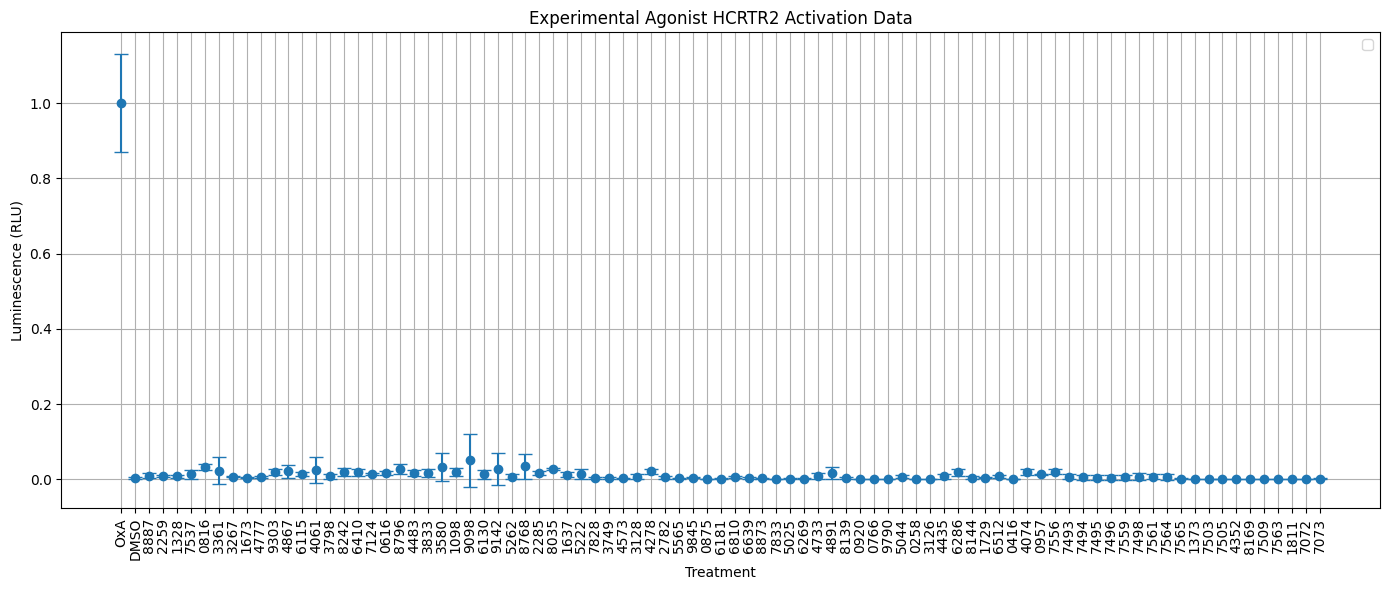

In [87]:
#make plot


plt.figure(figsize=(14, 6))
plt.errorbar(row_means.index, row_means, yerr=row_stds, fmt='o', capsize=5)

# Customizing the plot
plt.title('Experimental Agonist HCRTR2 Activation Data')
plt.xlabel('Treatment')
plt.ylabel('Luminescence (RLU)')
plt.xticks(rotation=90)  # Rotate x-axis labels if needed
plt.grid(True)
plt.legend()

# Show the plot
plt.tight_layout()
plt.show()

In [88]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats

# Step 1: Load the data
drug_data = pd.read_csv("all_agonist_1e-5_data_condensed_and_normalized.csv")

#drug_data.iloc[:, 1:5] = drug_data.iloc[:, 1:5] / row_mean

drug_data

,Treatment,Replicate 1,Replicate 2,Replicate 3,Replicate 4,Mean,Type
0,OxA,1.035194,0.851779,0.952503,1.160524,1.000000,ctrl+
1,DMSO,0.004355,0.001774,0.005000,0.004678,0.020675,ctrl-
2,8887,0.012172,0.017542,0.005728,0.002148,0.009398,1
3,2259,0.012888,0.007876,0.007160,0.006444,0.008592,1
4,1328,0.014678,0.003222,0.008234,0.007518,0.008413,1
...,...,...,...,...,...,...,...
82,7509,0.000421,0.000421,0.000541,0.000541,0.000481,4
83,7563,0.000541,0.000521,0.000761,0.000301,0.000531,4
84,1811,0.001743,0.001102,0.000521,0.000100,0.000867,4
85,7072,0.000741,0.002605,0.001122,0.000701,0.001292,4


In [89]:
oxa_row = drug_data[drug_data['Treatment'] == 'OxA']
dmso_row = drug_data[drug_data['Treatment'] == 'DMSO']
other_rows = drug_data[~drug_data['Treatment'].isin(['OxA', 'DMSO'])]
other_rows_sorted = other_rows.sort_values(by='Mean', ascending=False)
df_sorted = pd.concat([oxa_row, dmso_row, other_rows_sorted], ignore_index=True)

In [90]:
df_sorted

,Treatment,Replicate 1,Replicate 2,Replicate 3,Replicate 4,Mean,Type
0,OxA,1.035194,0.851779,0.952503,1.160524,1.000000,ctrl+
1,DMSO,0.004355,0.001774,0.005000,0.004678,0.020675,ctrl-
2,9098,0.156091,0.028640,0.007876,0.012172,0.051195,1
3,8768,0.084489,0.010382,0.028998,0.015752,0.034906,1
4,3580,0.088069,0.017900,0.010382,0.015036,0.032847,1
...,...,...,...,...,...,...,...
82,3126,0.001098,0.001030,0.000582,0.000605,0.000829,3
83,8169,0.000521,0.000561,0.001002,0.001202,0.000822,4
84,7503,0.000862,0.000641,0.000501,0.000401,0.000601,4
85,7563,0.000541,0.000521,0.000761,0.000301,0.000531,4


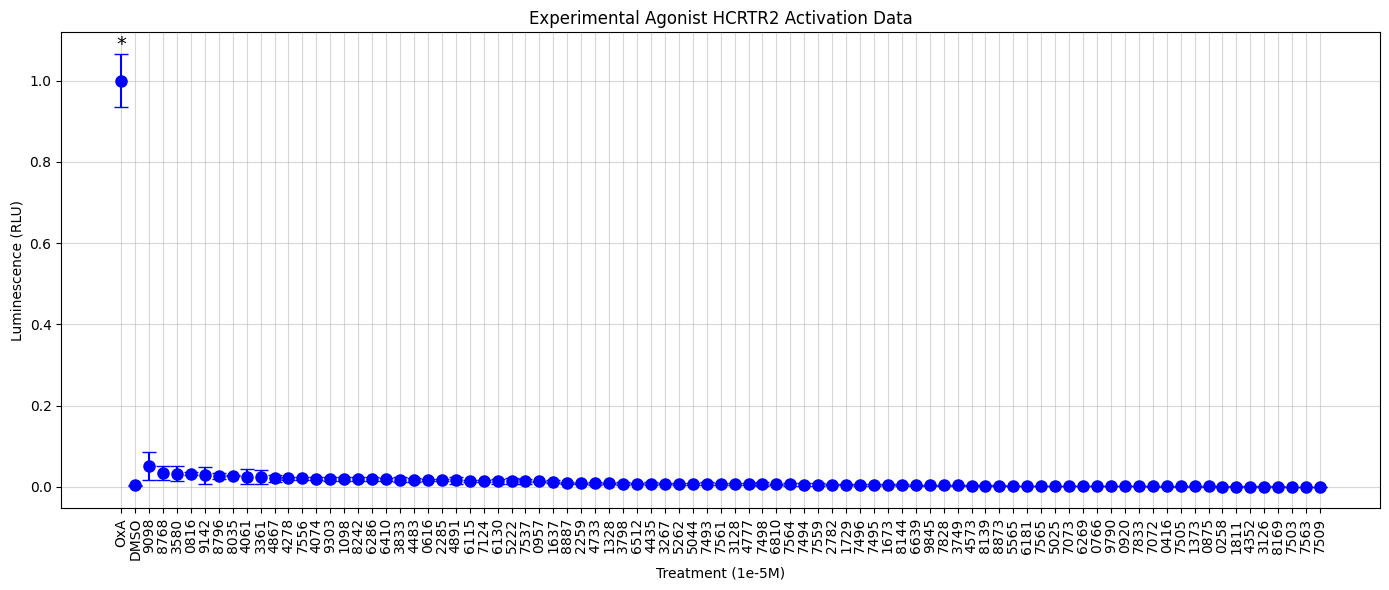

In [91]:
# Extract drug names (first column) and replicates (columns 2-5)
drug_names = df_sorted.iloc[:, 0]  # Drug names are in the first column
replicates = df_sorted.iloc[:, 1:5]  # Columns 2-5 contain the replicates for each drug

# Step 2: Calculate mean and standard error for each drug
drug_means = replicates.mean(axis=1)  # Mean across replicates (rows)
drug_sems = replicates.sem(axis=1)  # Standard error across replicates (rows)

# Step 3: Perform statistical analysis (t-test against the first drug)
# The first drug is the first row of replicates
#significantly different from dmso, not oxa
first_drug_values = replicates.iloc[1]  # First drug's replicates

plt.figure(figsize=(14, 6))

# Store p-values for the comparisons
p_values = []

for i, drug in enumerate(drug_names):
    # Compare each drug's data with the first drug using a t-test
    drug_values = replicates.iloc[i]  # Data for the current drug
    _, p_value = stats.ttest_ind(first_drug_values, drug_values, equal_var=False)  # Welch's t-test
    p_values.append(p_value)
    #print(i,p_value,drug_values)

# Step 4: Plot the data with error bars
#plt.figure(figsize=(10, 6))

# Plot the drugs with error bars
for i, drug in enumerate(drug_names):
    plt.errorbar(
        [i], drug_means[i], yerr=drug_sems[i], fmt="o", label=drug, capsize=5, markersize=8, color='blue'
    )

# Add asterisks for statistical significance
for i, p_value in enumerate(p_values):
    #temporary removal of asterisks for what is being lebeled as signficantly different from DMSO
    if i > 1:
        continue
    if p_value < 0.05:
        plt.text(
            i, drug_means[i] + drug_sems[i], "*", ha="center", va="bottom", fontsize=14, color="black"
        )

# Customize the plot
plt.title('Experimental Agonist HCRTR2 Activation Data')
plt.xlabel('Treatment (1e-5M)')
plt.ylabel('Luminescence (RLU)')
plt.xticks(np.arange(len(drug_names)), drug_names, rotation=90, ha="center")
plt.grid(alpha=0.5)
plt.tight_layout()


# Show the plot
plt.show()

In [92]:
oxa_row = drug_data[drug_data['Treatment'] == 'OxA']
dmso_row = drug_data[drug_data['Treatment'] == 'DMSO']
other_rows = drug_data[~drug_data['Treatment'].isin(['OxA', 'DMSO'])]
other_rows_sorted = other_rows.sort_values(by='Mean', ascending=False)
df_sorted = pd.concat([ dmso_row, other_rows_sorted], ignore_index=True)

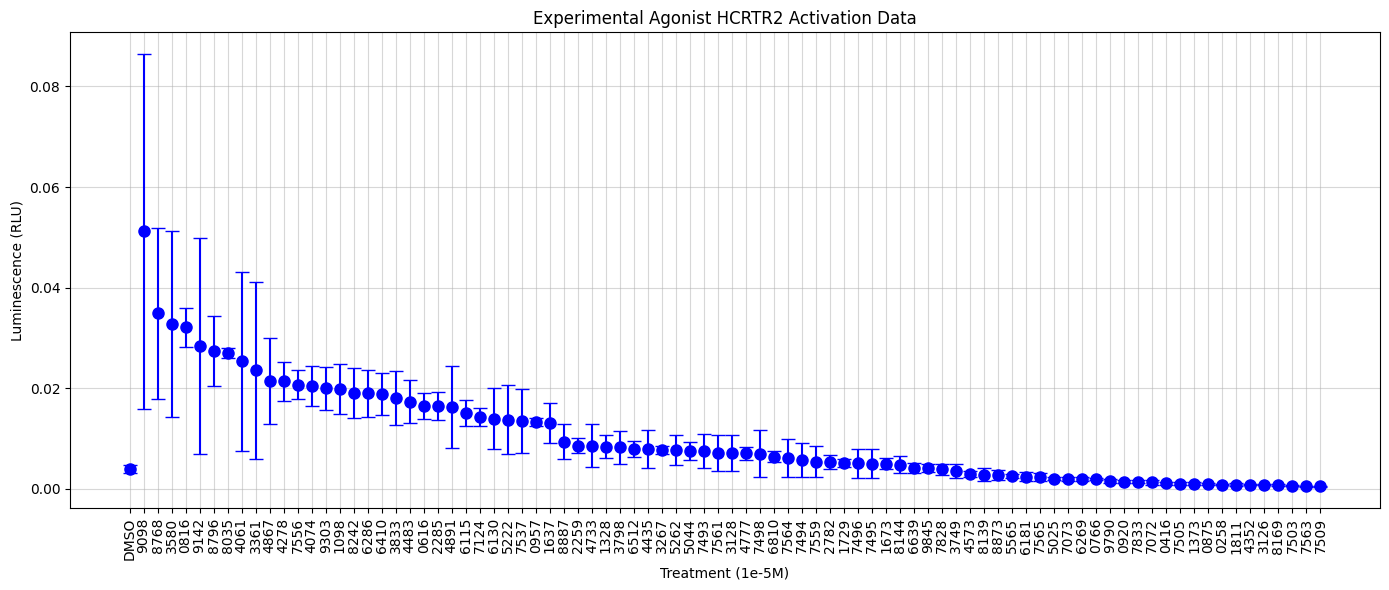

In [93]:
# Extract drug names (first column) and replicates (columns 2-5)
drug_names = df_sorted.iloc[:, 0]  # Drug names are in the first column
replicates = df_sorted.iloc[:, 1:5]  # Columns 2-5 contain the replicates for each drug

# Step 2: Calculate mean and standard error for each drug
drug_means = replicates.mean(axis=1)  # Mean across replicates (rows)
drug_sems = replicates.sem(axis=1)  # Standard error across replicates (rows)

# Step 3: Perform statistical analysis (t-test against the first drug)
# The first drug is the first row of replicates
#significantly different from dmso, not oxa
first_drug_values = replicates.iloc[1]  # First drug's replicates

plt.figure(figsize=(14, 6))

# Store p-values for the comparisons
p_values = []

for i, drug in enumerate(drug_names):
    # Compare each drug's data with the first drug using a t-test
    drug_values = replicates.iloc[i]  # Data for the current drug
    _, p_value = stats.ttest_ind(first_drug_values, drug_values, equal_var=False)  # Welch's t-test
    p_values.append(p_value)
    #print(i,p_value,drug_values)

# Step 4: Plot the data with error bars
#plt.figure(figsize=(10, 6))

# Plot the drugs with error bars
for i, drug in enumerate(drug_names):
    plt.errorbar(
        [i], drug_means[i], yerr=drug_sems[i], fmt="o", label=drug, capsize=5, markersize=8, color='blue'
    )

# Add asterisks for statistical significance
for i, p_value in enumerate(p_values):
    #temporary removal of asterisks for what is being lebeled as signficantly different from DMSO
    if i > 1:
        continue
    if p_value < 0.05:
        plt.text(
            i, drug_means[i] + drug_sems[i], "*", ha="center", va="bottom", fontsize=14, color="black"
        )

# Customize the plot
plt.title('Experimental Agonist HCRTR2 Activation Data')
plt.xlabel('Treatment (1e-5M)')
plt.ylabel('Luminescence (RLU)')
plt.xticks(np.arange(len(drug_names)), drug_names, rotation=90, ha="center")
plt.grid(alpha=0.5)
plt.tight_layout()


# Show the plot
plt.show()